In [79]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Data Visualization with Seaborn

Adapted from [this](https://datagy.io/python-seaborn/) guide to Seaborn.<br>
The content of some graphs were changed or confirmed as minor exercises in dataframe manipulation or to confirm the behavior of some Seaborn aggregations versus Pandas. An additional exercise using a different source of data to make meaningful graphs is included after the replication. The explanantion for some graph types are pulled from the website in order to make this a learning tool rather than just a replication

In [151]:
#WNBA data from FiveThirtyEight
df = pd.read_csv("https://github.com/fivethirtyeight/WNBA-stats/raw/master/wnba-player-stats.csv")
df.head()

,player_ID,Player,year_ID,Age,Tm,tm_gms,Tm_Net_Rtg,Pos,G,MP,...,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
0,montgre01w,Renee Montgomery,2019,32,ATL,34,-9.8,G,34,949,...,1.7,0.5,16.8,17.5,0.4,0.5,0.9,0.039,-2.4,1.22
1,williel01w,Elizabeth Williams,2019,26,ATL,34,-9.8,C-F,32,909,...,1.4,4.7,12.9,15.9,1.6,1.0,2.7,0.117,0.6,2.51
2,sykesbr01w,Brittney Sykes,2019,25,ATL,34,-9.8,G,34,880,...,1.2,1.5,14.8,23.1,-0.8,0.8,0.0,-0.001,-3.4,0.70
3,hayesti01w,Tiffany Hayes,2019,29,ATL,34,-9.8,G,29,817,...,1.8,0.8,14.0,27.1,0.5,0.6,1.0,0.050,-1.5,1.45
4,brelaje01w,Jessica Breland,2019,31,ATL,34,-9.8,F,33,767,...,2.8,3.6,11.6,18.9,-0.4,1.9,1.5,0.076,-0.8,1.62


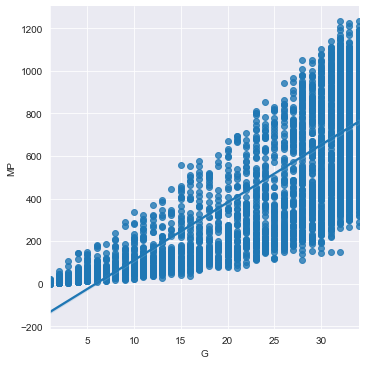

In [15]:
#Create a scatter plot and set style
sns.set_style("darkgrid")
sns.lmplot(data=df, x="G", y="MP")

All subsequent graphs are changed to have symbolically significant titles for the figure and its axes

Text(0.5, 6.799999999999994, 'Games Played')

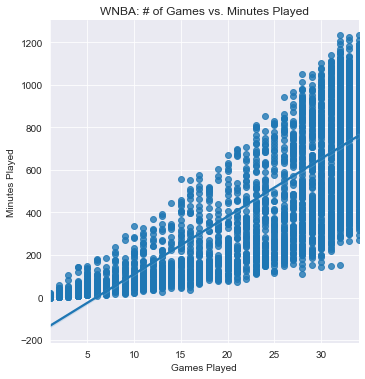

In [78]:
#Add labels and a title so the graph makes sense
super = sns.lmplot(data=df, x="G", y="MP")
#Relies on matplotlib to change the axes and other aspects of the graph
plt.title("WNBA: # of Games vs. Minutes Played")
plt.ylabel("Minutes Played")
plt.xlabel("Games Played")

#plt.show() #Used when not in Jupyter Notebook

**Palette color options**<br>
Palettes represent various arrangements of color spectrums, so they can be separated into any number of discrete values, or be used as a continuous map with keyword argument `as_cmap` set to True. Adding `_r` to the end of the unqualified name of the color string will usually reverse the displayed color spectrum. As an example palette name `rocket` will be reversed when `rocket_r` is called as the palette name.<br>

When setting a palette, the number of colors in the palette range MUST match the number of different series to plot<br>
(e.g. A 2 series line plot will only need a color palette with 2 different color values)<br>
More palettes options and documentation available [here](https://seaborn.pydata.org/tutorial/color_palettes.html)

Qualitative palettes


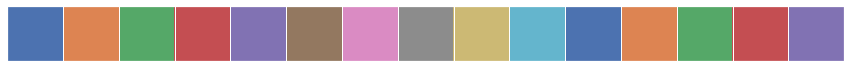

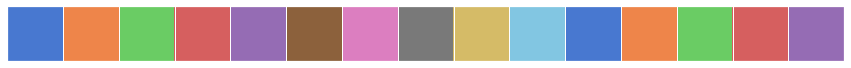

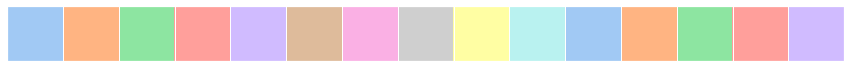

In [176]:
#Displaying seaborn color palette range for multiple palettes
print("Qualitative palettes")
q_palettes = ["deep", "muted", "pastel"]

for name in q_palettes:
    sns.palplot(sns.color_palette(name, 15))

Sequential color palettes


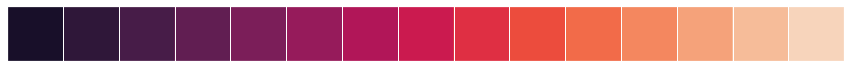

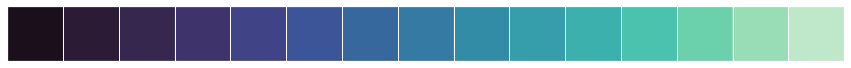

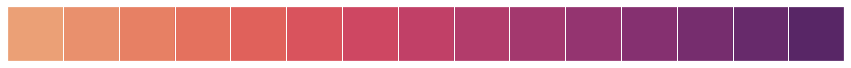

In [177]:
print("Sequential color palettes")
s_palettes = ["rocket", "mako", "flare"]

for name in s_palettes:
    sns.palplot(sns.color_palette(name, 15))

Diverging color palettes


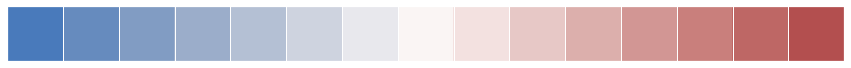

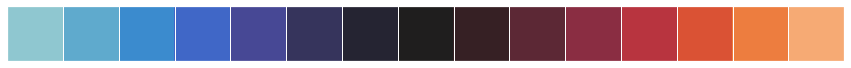

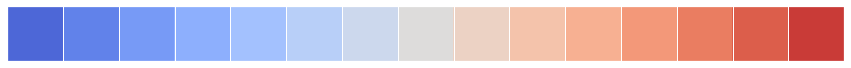

In [178]:
print("Diverging color palettes")
d_palettes = ["vlag", "icefire", "coolwarm"]

for name in d_palettes:
    sns.palplot(sns.color_palette(name, 15))

## Relational Plots with Seaborn<br>

**Scatter plot**

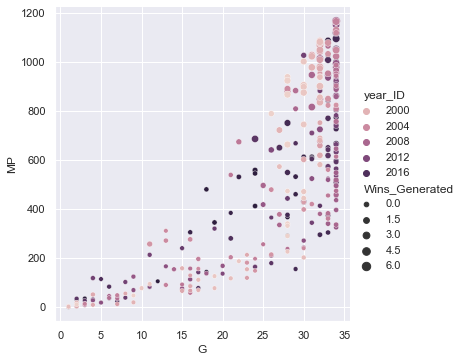

In [112]:
#Creating a relational scatter plot for the same data, but refined to see relationship for one team
sns.relplot(data=df[df["Tm"] == "NYL"], 
            x="G", 
            y="MP",
            hue="year_ID",
            size="Wins_Generated",)

**Line plot**

Text(0.5, 8.960000000000022, 'Year')

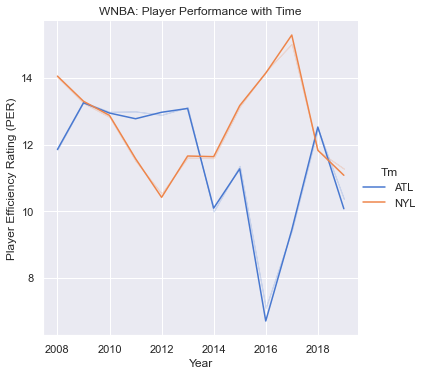

In [146]:
#Default palette lacks contrast, switch to muted for better visibility
sns.set()
sns.set_style("darkgrid")
'''
History for NYL stretches farther back than ATL
We can restrict data view to a timeframe where data for both teams 
are available to get a better side-by-side comparison
'''
sns.relplot(data=df[(df["Tm"].isin(["NYL", "ATL"])) & (df["year_ID"] > 2007)], 
            x="year_ID", 
            y="PER", 
            kind="line",
            hue="Tm",
            palette=sns.color_palette("muted", 2),
            ci=False)

#Clean up axes and title to make an interpretable graph
plt.title("WNBA: Player Performance with Time")
plt.ylabel("Player Efficiency Rating (PER)")
plt.xlabel("Year")

## Categorical Plots with Seaborn<br>

**Bar plots**

Text(0.5, 8.95999999999998, 'Team')

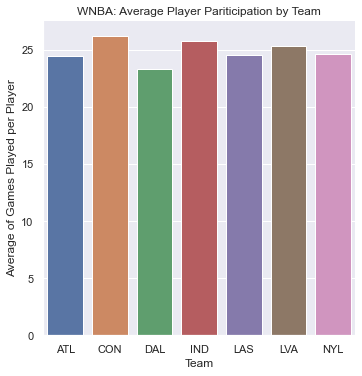

In [181]:
#Plot average num of games played by a player per team, omitting error bars
teams = ["ATL", "NYL", "CON", "DAL", "IND", "LAS", "LVA"]

sns.catplot(data=df[df["Tm"].isin(teams)],
            x="Tm",
            y="G",
            kind="bar",
            ci=False)

plt.title("WNBA: Average Player Pariticipation by Team")
plt.ylabel("Average of Games Played per Player")
plt.xlabel("Team")

Text(0.5, 8.95999999999998, 'Team')

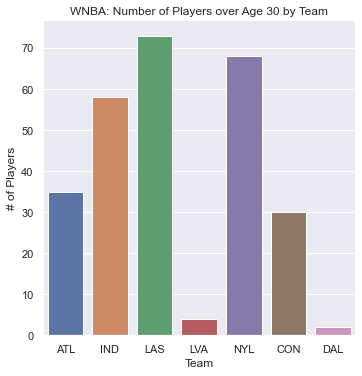

In [180]:
#Using counts to aggregate players over 30 years old (site example finds players with less than 5 games played)
teams = ["ATL", "NYL", "CON", "DAL", "IND", "LAS", "LVA"]

sns.catplot(data=df[(df["Tm"].isin(teams) & (df["Age"] >= 30))],
            x="Tm",
            kind="count")

plt.title("WNBA: Number of Players over Age 30 by Team")
plt.ylabel("# of Players")
plt.xlabel("Team")

It is always good to confirm that behavior of an aggregation works as expected. We can confirm the Seaborn graph aggregation was correct by using pandas aggregations to check the dataframe for consistent results by team

In [154]:
old = df[(df["Tm"].isin(teams) & (df["Age"] >= 30))] 
#Dictionary construction matching team to # of players over 30
#By inspection of dataframe size, it can be confirmed if the aggregation was correct
old_by_team = {}
for team in teams:
    old_by_team[team] = old[old["Tm"] == team].shape[0]

#All players in the dataframe should be at least 30 years old
#Print and compare with graph results
for team in old_by_team:
    print(f"Team {team} has {old_by_team[team]} players over the age of 30")

Team ATL has 35 players over the age of 30
Team NYL has 68 players over the age of 30
Team CON has 30 players over the age of 30
Team DAL has 2 players over the age of 30
Team IND has 58 players over the age of 30
Team LAS has 73 players over the age of 30
Team LVA has 4 players over the age of 30


**Box plots** are another very useful plot for showing distributions within a range of categories.<br>
Boxplots break your data in four different quartiles and show outliers to the data (at both extremes)

Top whisker to edge of upper box = 1st quartile,
Upper box = 2nd quartile,
Lower box = 3rd quartile,
Edge of lower box to bottom whisker = 4th quartile

Text(0.5, 8.95999999999998, 'Team')

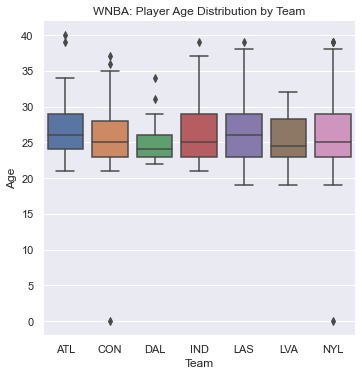

In [149]:
#Box plot to depict age range of players by quartile
teams = ["ATL", "NYL", "CON", "DAL", "IND", "LAS", "LVA"]
sns.catplot(data=df[df["Tm"].isin(teams)], 
            x="Tm",
            y="Age",
            kind="box")

#Diamonds are outliers that deviate too far from the bulk of the data,
#and so are not included in the whisker but as separate points
plt.title("WNBA: Player Age Distribution by Team")
plt.ylabel("Age")
plt.xlabel("Team")

**Violin plots** show the kernel density distribution within each category. 

For the below graph:<br>
The white dot represents the median value,<br>
The thick dark line represents the interquartile range (25th to 75th percentile),<br>
The thin line represents the rest of the range (excluding outliers)<br>
The width of the violin represents the amount of values that fall into that y-range.

For the below graph for Dallas, it is observed that the greatest amount of players fall in the early to mid 20s range in terms of age since the graph's width is widest at those points and steadily decreases as age increases (IQR also covers most of the highest width sections)

Violin plots can sometimes be difficult to interpret, so use with caution when attempting to use for analysis depending on audience.

Text(0.5, 8.95999999999998, 'Team')

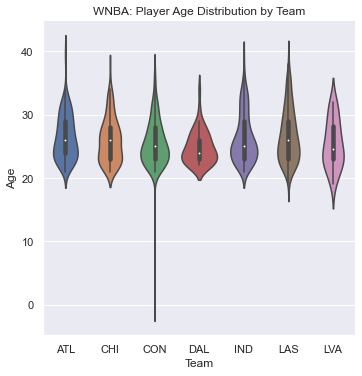

In [164]:
#Violin plot showing frequency of an age for players in a team

#Notice that violin plots treat outliers differently, including them in the full range
#rather than designating them specifically as outlier points
teams = ["ATL", "CHI", "CON", "DAL", "IND", "LAS", "LVA"]
sns.catplot(data=df[df["Tm"].isin(teams)], 
            x="Tm", 
            y="Age", 
            kind="violin")
plt.title("WNBA: Player Age Distribution by Team")
plt.ylabel("Age")
plt.xlabel("Team")

## Distributional Plots with Seaborn

**Histograms** form bins to group data and their frequencies within a data set.

A **Kernel Density Estimate**, or KDE, is essentially the continuous line variant of the histogram

Note that while the tutorial says that you can show a KDE curve by setting kwarg `hist` to False when calling method `distplot`, this method is deprecated and replacement method `displot` does not support the same boolean. To show only the KDE curve, set kwarg `kind` to `"kde"` or use method `kdeplot` instead of displot

Text(0.5, 8.95999999999998, 'Age')

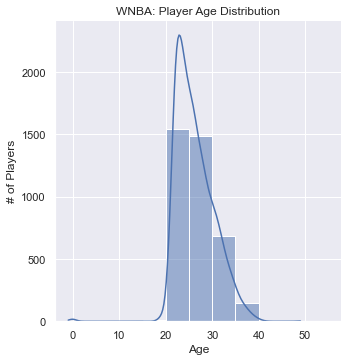

In [184]:
'''
kwarg bins can take a list generated by range function or a regular list as the intervals
of a dataset to categorize and group data.
Here players are separated into categories by 5 year intervals, but bins don't always have to be uniform in size.

kawrg kde shows the Kernel Density Estimate curve
'''

#Show the KDE AND the histogram
sns.displot(data=df["Age"], 
            kde=True,
            bins=range(0, 60, 5))
plt.title("WNBA: Player Age Distribution")
plt.ylabel("# of Players")
plt.xlabel("Age")

## Multiple Charts in Seaborn

By desginating values for the `col` and `row` kwargs, a grid of tables can made for related data. Investigating the `map` method of object `FacetGrid` is an alternate approach to creating multiple charts of related data

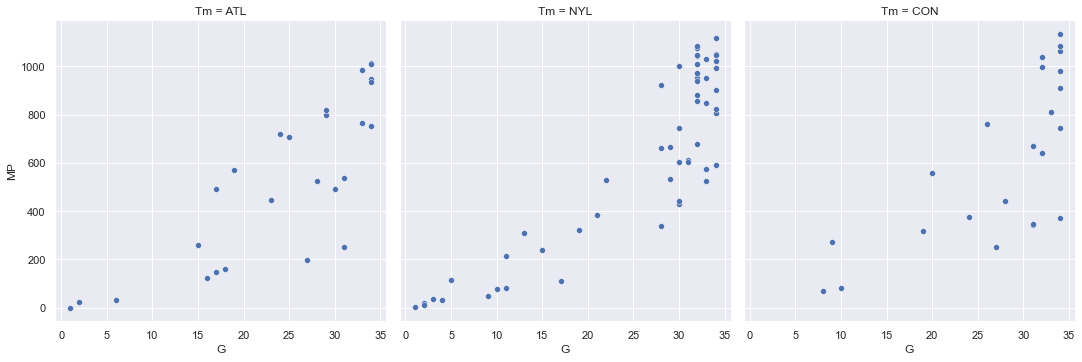

In [223]:
teams = ["ATL", "NYL", "CON"]
years = [2017, 2018, 2019]
data = df[(df["Tm"].isin(teams)) & (df["Age"] > 30)].reset_index(drop=True)
sns.relplot(data=data, x='G', y='MP', col="Tm")

## Extended Example

Using FiveThirtyEight's NFL data from the Storage Formats, the aim will be to make some useful graphs using a different set of data.

In [263]:
import numpy as np
url = "https://raw.githubusercontent.com/fivethirtyeight/nfl-elo-game/"
url += "3488b7d0b46c5f6583679bc40fb3a42d729abd39/data/nfl_games.csv"
df = pd.read_csv(url, index_col=0)
df

,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
date,,,,,,,,,,,
1920-09-26,1920,0,0,RII,STP,1503.947000,1300.000000,0.824651,48,0,1.0
1920-10-03,1920,0,0,AKR,WHE,1503.420000,1300.000000,0.824212,43,0,1.0
1920-10-03,1920,0,0,RCH,ABU,1503.420000,1300.000000,0.824212,10,0,1.0
1920-10-03,1920,0,0,DAY,COL,1493.002000,1504.908000,0.575819,14,0,1.0
1920-10-03,1920,0,0,RII,MUN,1516.108000,1478.004000,0.644171,45,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-01-15,2016,0,1,DAL,GB,1617.794683,1635.451172,0.567714,31,34,0.0
2017-01-15,2016,0,1,KC,PIT,1681.926463,1647.734179,0.638993,16,18,0.0
2017-01-22,2016,0,1,ATL,GB,1664.127266,1651.537731,0.609840,44,21,1.0


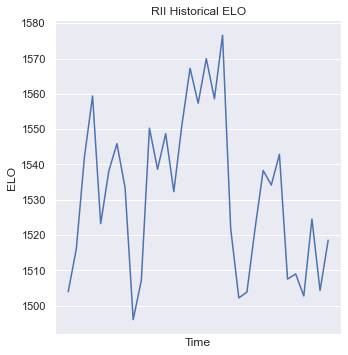

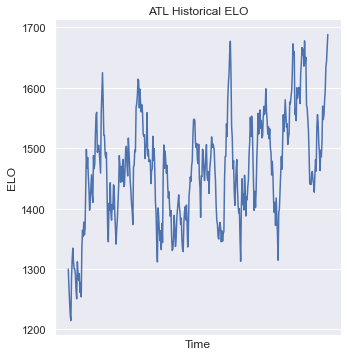

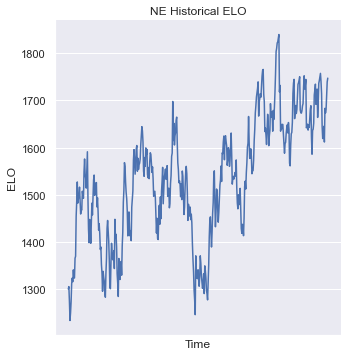

In [290]:
#Put teams you want here
teams = ["RII", "ATL", "NE"]

data = df[((df["team1"].isin(teams)) |
          (df["team2"].isin(teams)))]

for team in teams:
    #Grabbing elo depending on whether it is team or team 2
    elo_table = df.loc[df['team1'] == team]['elo1']
    elo_table.append(df.loc[df['team2'] == team]['elo2'])
    elo_table.sort_index()
    sns.relplot(x=elo_table.index, y=elo_table.values, kind="line")
    #Figure formatting
    plt.title(f"{team} Historical ELO")
    plt.ylabel("ELO")
    plt.xlabel("Time")
    plt.xticks([])

What we have essentially made is an ELO tracker over time for any given NFL team!

NOTE: Due to the large volume of data and matplotlib being extremely annoying, the x ticks for dates were removed since there was no easy solution to editing the tick frequency.

An additional approach is constructing a new dataframe by readding the teamname column to each series and concatenating results for every team we want, and use the `row` and `col` approach for showing stacked graphs.